<a href="https://colab.research.google.com/github/Zul-Qarnain/Math6_project/blob/main/MATH6_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Correlation**

In [ ]:
!pip install pandas numpy scipy statsmodels matplotlib seaborn openpyxl


Successfully loaded Math6.csv
Dataset shape: (114, 42)

--- Starting Data Cleaning ---
--- Data Cleaning Finished ---
Cleaned dataset shape: (113, 68)


--- Correlation Analysis ---

Correlation Matrix:
                                                    cgpa_numeric  \
cgpa_numeric                                            1.000000   
curiosity_score                                         0.158378   
competence_focus_score                                  0.179661   
prior_exp_numeric                                      -0.011865   
hs_stem_perf_numeric                                    0.165590   
confidence_major_numeric                                0.256578   
10.Rate the following factors in terms of how t...      0.140330   
10.Rate the following factors in terms of how t...      0.196882   
10.Rate the following factors in terms of how t...      0.058930   
12.How many hours per week do you typically spe...      0.127248   

                                                

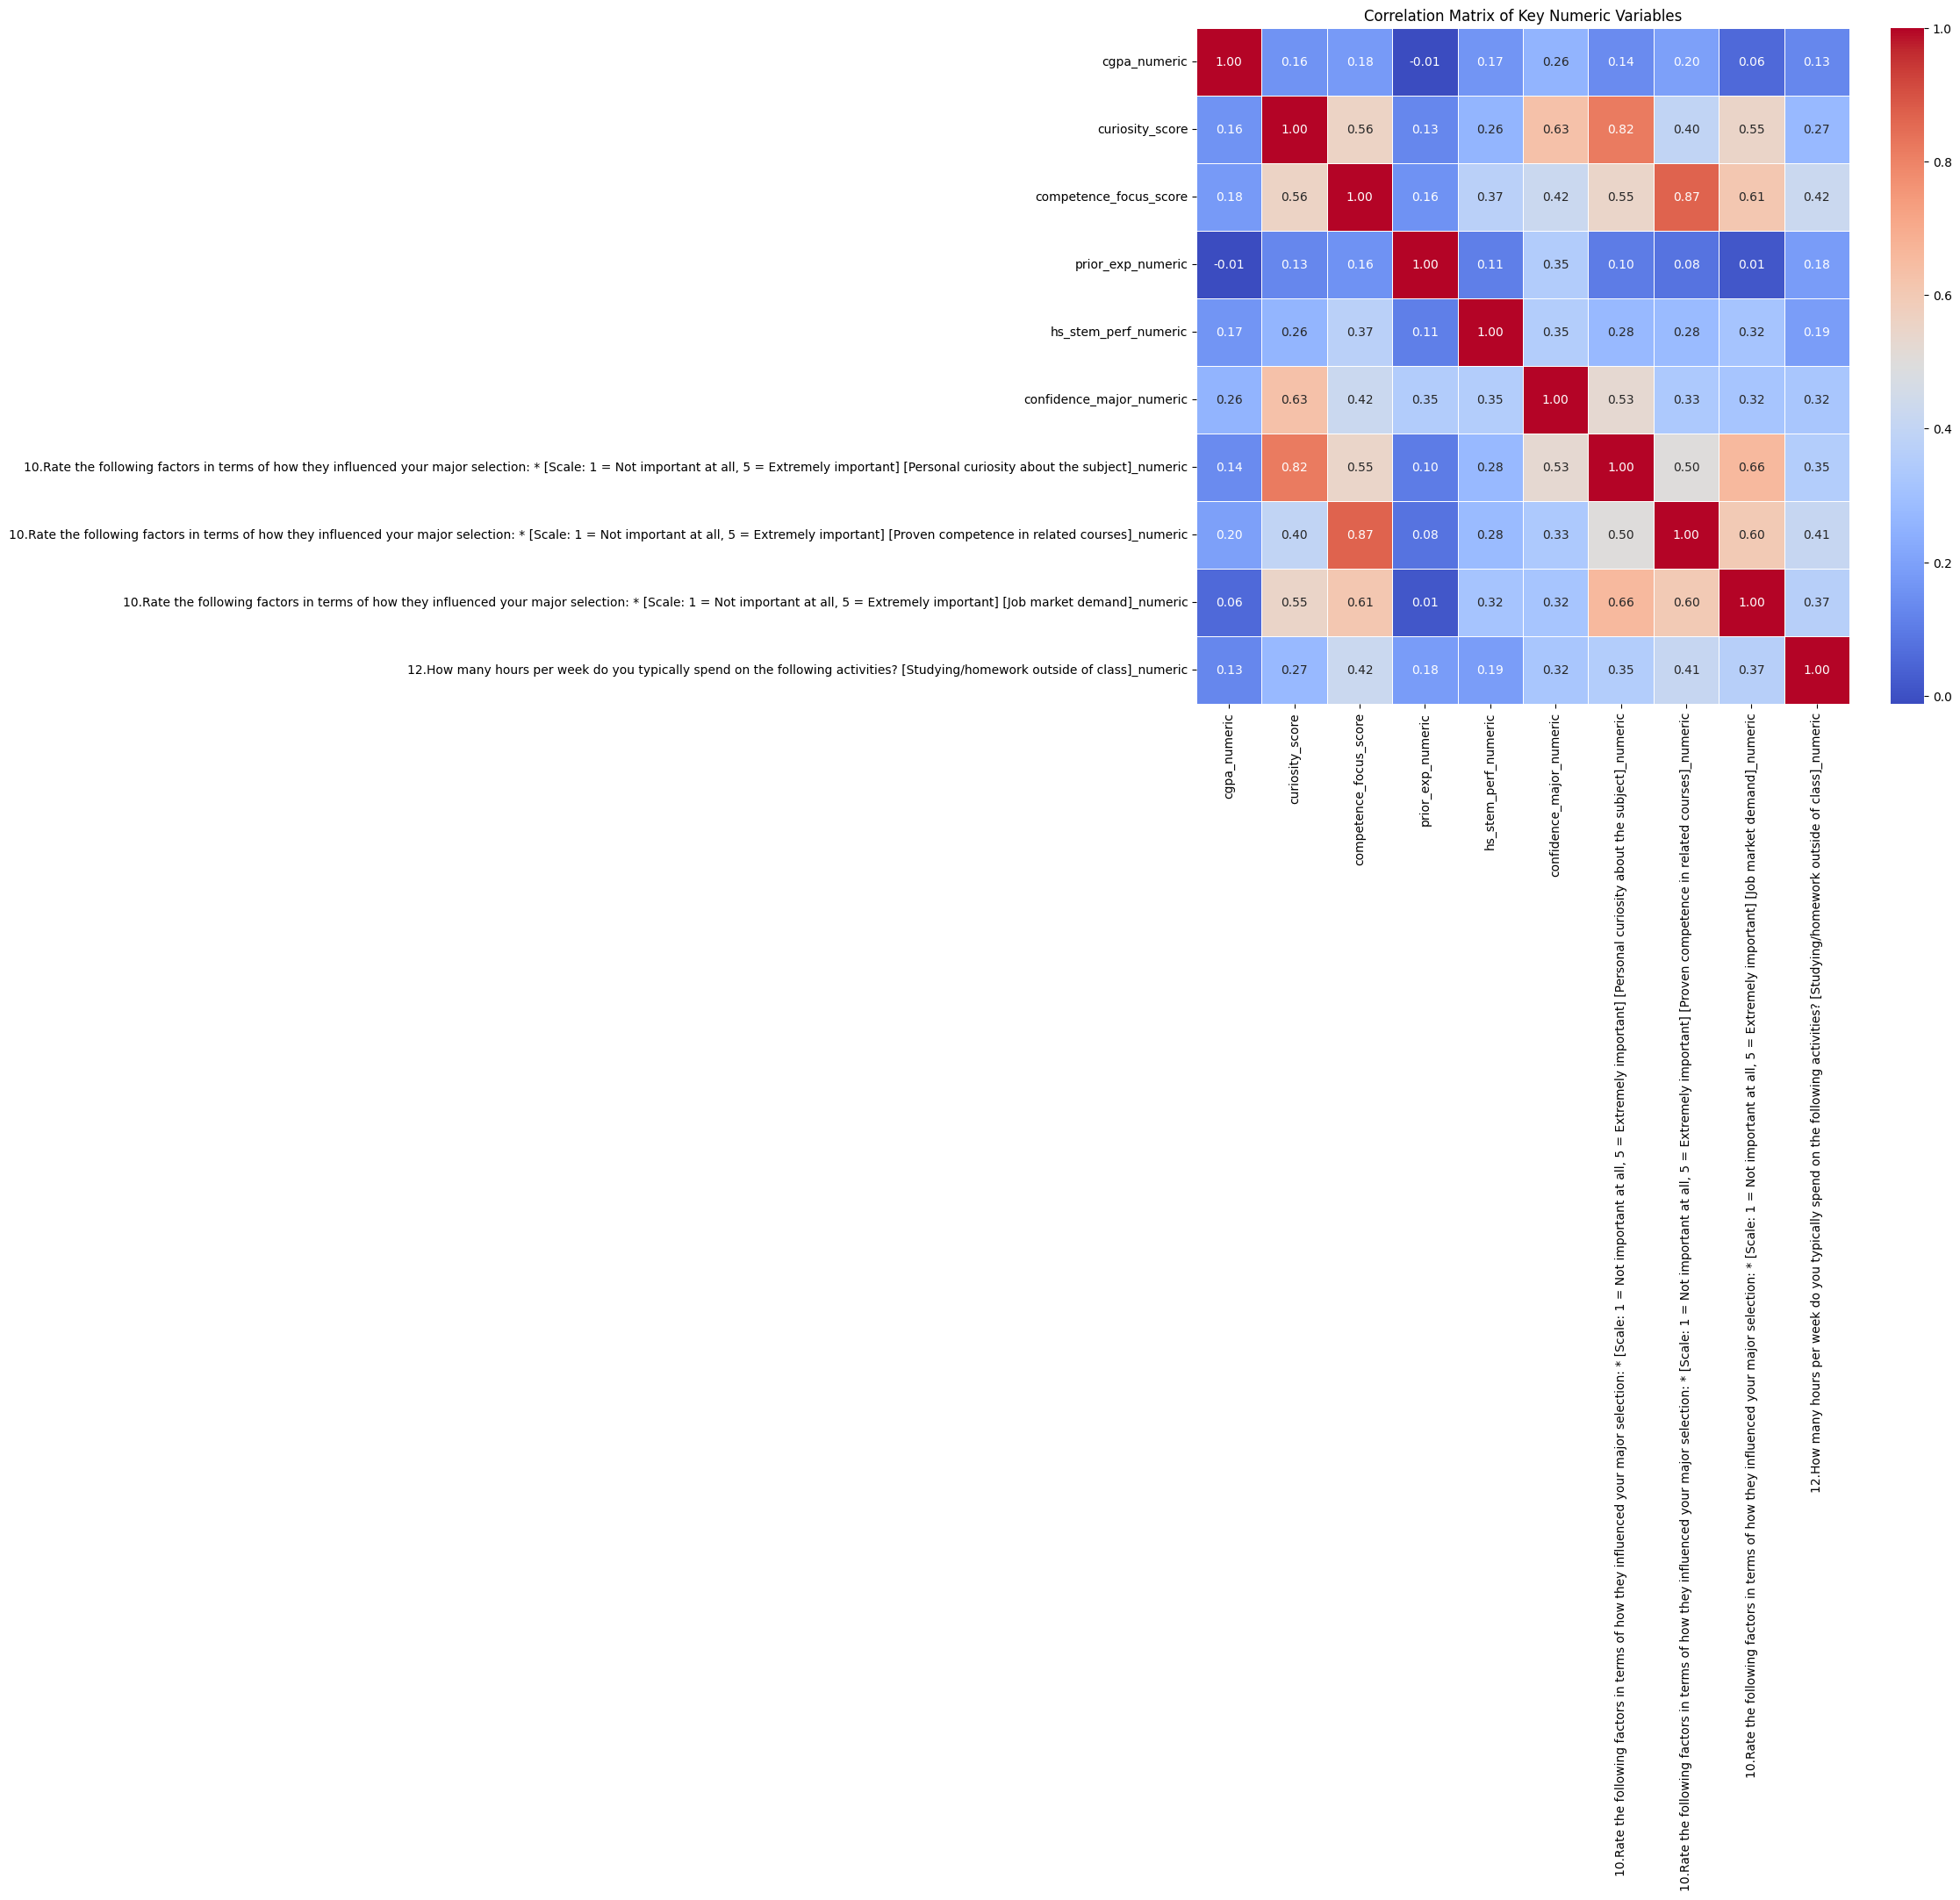



--- Chi-Square Test of Independence ---

Chi-Square: 2. What is your Gender ? vs. 17.Which statement better describes your approach to learning in your STEM major?   
Contingency Table:
17.Which statement better describes your approach to learning in your STEM major?     I balance both curiosity and competence equally  \
2. What is your Gender ?                                                                                                                
Female                                                                                                                             13   
Male                                                                                                                               23   

17.Which statement better describes your approach to learning in your STEM major?     I focus more on areas where I already demonstrate competence and can excel  \
2. What is your Gender ?                                                                           

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
try:
    df = pd.read_csv("/content/sample_data/math6.csv")
except FileNotFoundError:
    print("Error: 'Math6.csv' not found. Make sure it's in the same directory as the script.")
    exit()

print("Successfully loaded Math6.csv")
print(f"Dataset shape: {df.shape}")
# print("Column names (copy and paste these into the script if needed):")
# print(df.columns.tolist()) # UNCOMMENT THIS TO SEE YOUR EXACT COLUMN NAMES

# --- 2. Data Cleaning and Preparation ---
print("\n--- Starting Data Cleaning ---")

# It's good practice to work on a copy
df_cleaned = df.copy()

# --- A. Define Column Names (ADJUST THESE TO MATCH YOUR FILE EXACTLY) ---
# These are educated guesses based on your previous snippet.
# YOU MUST VERIFY AND CHANGE THESE IF THEY ARE INCORRECT.
col_age = "1.What is your age ?"
col_gender = "2. What is your Gender ?"
col_uni = "3.Which university did you study at?"
col_dept = "4.Which Department Are you IN?"
col_semester = "5.Which semester are you in right now?"
col_prior_exp = "6. Before entering university, what was your level of prior experience with your current field of study? "
col_hs_stem_perf = "7. How would you rate your academic performance in STEM subjects during high school? "
col_hs_stem_activities = "8.Before university, how actively did you participate in STEM-related extracurricular activities?"
col_primary_motivation = "9. What was your primary motivation for choosing your current STEM major?"

# Q10 Factors (Likert 1-5, text based on CSV structure)
col_q10_curiosity = "10.Rate the following factors in terms of how they influenced your major selection: * [Scale: 1 = Not important at all, 5 = Extremely important] [Personal curiosity about the subject]"
col_q10_competence = "10.Rate the following factors in terms of how they influenced your major selection: * [Scale: 1 = Not important at all, 5 = Extremely important] [Proven competence in related courses]"
col_q10_job_market = "10.Rate the following factors in terms of how they influenced your major selection: * [Scale: 1 = Not important at all, 5 = Extremely important] [Job market demand]"
# ... Add other Q10 columns if needed

col_when_decided_major = "11.When did you decide on your current major?"
col_confidence_major_enroll = "12.How confident were you in your choice of major when you first enrolled? "

# Q12 Hours (Ranges)
col_q12_hrs_classes = "12.How many hours per week do you typically spend on the following activities? [Attending classes]"
col_q12_hrs_studying = "12.How many hours per week do you typically spend on the following activities? [Studying/homework outside of class]"
col_q12_hrs_lab = "12.How many hours per week do you typically spend on the following activities? [Lab work]"
col_q12_hrs_extracurricular = "12.How many hours per week do you typically spend on the following activities? [STEM-related extracurricular activities]"
col_q12_hrs_projects = "12.How many hours per week do you typically spend on the following activities? [STEM-related personal projects]"
col_q12_hrs_research = "12.How many hours per week do you typically spend on the following activities? [Research]"

col_cgpa = "13. What is your  current CGPA (Cumulative GPA) ? \n(if you in 1st semester just type 0)"
col_perf_vs_expect = "14.How does your performance compare to your initial expectations when you entered the program? "
col_best_course_types = "15.In which types of STEM courses do you typically perform best?"
col_learning_approach = "17.Which statement better describes your approach to learning in your STEM major?   " # Note: Q17 is repeated
col_response_difficult_material = "16.How do you respond when faced with difficult course material?" # Note: Q16 and Q17 seem swapped in order in header vs position

# Q19 Agreement (Likert text)
col_q19_explore_beyond = "19.Rate your agreement with the following statements: * [Scale: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree] [I often explore topics beyond what's required for my courses]"
col_q19_prioritize_easy_competence = "19.Rate your agreement with the following statements: * [Scale: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree] [I prioritize courses where I can easily demonstrate competence]"
col_q19_enjoy_struggle = "19.Rate your agreement with the following statements: * [Scale: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree] [I enjoy the process of learning even when I struggle]"
col_q19_avoid_risk_gpa = "19.Rate your agreement with the following statements: * [Scale: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree] [I avoid academic risks that might lower my GPA]"
col_q19_motivated_curiosity_not_grades = "19.Rate your agreement with the following statements: * [Scale: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree] [I'm motivated primarily by curiosity rather than grades]"
col_q19_pursue_understanding = "19.Rate your agreement with the following statements: * [Scale: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree] [I pursue understanding rather than memorization]"

col_plans_after_degree = "17.What are your plans after completing your current degree?   " # Note: This Q17 is different from the learning approach one
col_choose_major_again = "21. Looking back, would you choose the same major again?"


# --- B. Clean CGPA ---
# Convert CGPA to numeric, coercing errors. Handles "3.50+", "3:41" (if it was 3.41), "."
# Values like "Not Interested to tell" will become NaN.
# "0" for 1st semester students: You need to decide how to handle these.
# For correlation/regression with CGPA, you might want to filter them out or treat 0 as actual 0.
df_cleaned['cgpa_numeric'] = pd.to_numeric(df_cleaned[col_cgpa], errors='coerce')
# Example: Handle "3.6++" or similar if pd.to_numeric misses them
df_cleaned['cgpa_numeric'] = df_cleaned['cgpa_numeric'].replace('3.6++', 3.6).astype(float) # add other specific string replacements if needed
df_cleaned['cgpa_numeric'] = df_cleaned['cgpa_numeric'].replace('3.50+', 3.5).astype(float)


# Filter out CGPA > 4 or < 0 (unless your scale is different)
df_cleaned = df_cleaned[(df_cleaned['cgpa_numeric'] <= 4) | (df_cleaned['cgpa_numeric'].isna())]
df_cleaned = df_cleaned[(df_cleaned['cgpa_numeric'] >= 0) | (df_cleaned['cgpa_numeric'].isna())]

# For analyses involving CGPA, you might want to drop NaNs or rows where CGPA is 0 (1st sem)
# df_analysis_cgpa = df_cleaned.dropna(subset=['cgpa_numeric'])
# df_analysis_cgpa = df_analysis_cgpa[df_analysis_cgpa['cgpa_numeric'] > 0] # Exclude 1st sem students

# --- C. Convert Likert Scales (Q10 and Q19) to Numeric ---
likert_map_importance = {
    'Not important at all': 1,
    'Slightly important': 2,
    'Moderately important': 3,
    'Very important': 4,
    'Extremely important': 5
}
q10_cols_to_map = [col_q10_curiosity, col_q10_competence, col_q10_job_market] # Add others
for col in q10_cols_to_map:
    if col in df_cleaned.columns:
        df_cleaned[col + '_numeric'] = df_cleaned[col].map(likert_map_importance)
    else:
        print(f"Warning: Column '{col}' not found for Q10 mapping.")


likert_map_agreement = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}
q19_cols_to_map = [
    col_q19_explore_beyond, col_q19_prioritize_easy_competence, col_q19_enjoy_struggle,
    col_q19_avoid_risk_gpa, col_q19_motivated_curiosity_not_grades, col_q19_pursue_understanding
]
for col in q19_cols_to_map:
    if col in df_cleaned.columns:
        df_cleaned[col + '_numeric'] = df_cleaned[col].map(likert_map_agreement)
    else:
        print(f"Warning: Column '{col}' not found for Q19 mapping.")


# --- D. Convert Time Spent (Q12 Hours) to Numeric (use mid-points or lower bounds) ---
hours_map = {
    '0 hours': 0,
    '1-3 hours': 2,   # Mid-point
    '4-6 hours': 5,   # Mid-point
    '7-9 hours +': 8, # Could be 8, 9, or 10 (be consistent)
    '10+ hours': 10   # Could be 10, 12 (be consistent)
}
q12_hrs_cols_to_map = [
    col_q12_hrs_classes, col_q12_hrs_studying, col_q12_hrs_lab,
    col_q12_hrs_extracurricular, col_q12_hrs_projects, col_q12_hrs_research
]
for col in q12_hrs_cols_to_map:
    if col in df_cleaned.columns:
        df_cleaned[col + '_numeric'] = df_cleaned[col].map(hours_map)
    else:
        print(f"Warning: Column '{col}' not found for Q12 hours mapping.")


# --- E. Convert Ordinal Categorical Variables to Numeric ---
# Example: Prior Experience
prior_exp_map = {
    'No prior experience': 1,
    'Basic knowledge from high school courses only': 2,
    'Self-study and personal projects': 3,
    'Related work or internship experience': 4,
    'Advanced high school courses (AP, IB, etc.)': 3 # Note: this might need reordering or combining
}
if col_prior_exp in df_cleaned.columns:
    df_cleaned['prior_exp_numeric'] = df_cleaned[col_prior_exp].map(prior_exp_map)

# Example: High School STEM Performance
hs_perf_map = {
    'Poor': 1,
    'Below average': 2,
    'Average': 3,
    'Above average': 4,
    'Excellent': 5
}
if col_hs_stem_perf in df_cleaned.columns:
    df_cleaned['hs_stem_perf_numeric'] = df_cleaned[col_hs_stem_perf].map(hs_perf_map)

# Example: Confidence in Major
confidence_map = {
    'Not confident at all': 1,
    'Slightly confident': 2,
    'Moderately confident': 3,
    'Very confident': 4,
    'Extremely confident': 5
}
if col_confidence_major_enroll in df_cleaned.columns:
    df_cleaned['confidence_major_numeric'] = df_cleaned[col_confidence_major_enroll].map(confidence_map)


# --- F. Create Dummy Variables for Multi-Select Categorical (Q15 Best Course Types) ---
if col_best_course_types in df_cleaned.columns:
    # First, ensure the column is string and handle NaNs by filling with an empty string
    df_cleaned[col_best_course_types] = df_cleaned[col_best_course_types].astype(str).fillna('')
    course_type_dummies = df_cleaned[col_best_course_types].str.get_dummies(sep=', ')
    # Add prefix to avoid name collisions
    course_type_dummies = course_type_dummies.add_prefix('BestCourse_')
    df_cleaned = pd.concat([df_cleaned, course_type_dummies], axis=1)
else:
    print(f"Warning: Column '{col_best_course_types}' not found for dummy variable creation.")

# --- G. Create Composite Scores (Optional, but good for your research questions) ---
# Example: Curiosity Score (average of relevant Q10 and Q19 items)
curiosity_items_numeric = []
if col_q10_curiosity + '_numeric' in df_cleaned.columns:
    curiosity_items_numeric.append(col_q10_curiosity + '_numeric')
if col_q19_explore_beyond + '_numeric' in df_cleaned.columns:
    curiosity_items_numeric.append(col_q19_explore_beyond + '_numeric')
if col_q19_motivated_curiosity_not_grades + '_numeric' in df_cleaned.columns:
    curiosity_items_numeric.append(col_q19_motivated_curiosity_not_grades + '_numeric')

if curiosity_items_numeric: # only create if items exist
    df_cleaned['curiosity_score'] = df_cleaned[curiosity_items_numeric].mean(axis=1, skipna=True) # skipna is important

# Example: Competence Focus Score
competence_items_numeric = []
if col_q10_competence + '_numeric' in df_cleaned.columns:
    competence_items_numeric.append(col_q10_competence + '_numeric')
if col_q19_prioritize_easy_competence + '_numeric' in df_cleaned.columns:
    competence_items_numeric.append(col_q19_prioritize_easy_competence + '_numeric')
# Add others if relevant

if competence_items_numeric:
    df_cleaned['competence_focus_score'] = df_cleaned[competence_items_numeric].mean(axis=1, skipna=True)

print("--- Data Cleaning Finished ---")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
# print("\nSample of cleaned data (first 5 rows):")
# print(df_cleaned.head())
# df_cleaned.info() # UNCOMMENT to see data types and non-null counts of new columns

# --- 3. Correlation Analysis ---
print("\n\n--- Correlation Analysis ---")
# Select numeric columns for correlation
# Be careful to select only truly numeric columns that make sense for correlation
numeric_cols_for_corr = [
    'cgpa_numeric', 'curiosity_score', 'competence_focus_score',
    'prior_exp_numeric', 'hs_stem_perf_numeric', 'confidence_major_numeric'
]
# Add numeric Q10, Q19, Q12 columns
if col_q10_curiosity + '_numeric' in df_cleaned.columns: numeric_cols_for_corr.append(col_q10_curiosity + '_numeric')
if col_q10_competence + '_numeric' in df_cleaned.columns: numeric_cols_for_corr.append(col_q10_competence + '_numeric')
if col_q10_job_market + '_numeric' in df_cleaned.columns: numeric_cols_for_corr.append(col_q10_job_market + '_numeric')
if col_q12_hrs_studying + '_numeric' in df_cleaned.columns: numeric_cols_for_corr.append(col_q12_hrs_studying + '_numeric')
# Add more as needed

# Filter out columns that might not exist if there were warnings during cleaning
existing_numeric_cols_for_corr = [col for col in numeric_cols_for_corr if col in df_cleaned.columns]

if not existing_numeric_cols_for_corr:
    print("No valid numeric columns found for correlation. Check cleaning steps and column names.")
else:
    correlation_matrix = df_cleaned[existing_numeric_cols_for_corr].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Focus on correlations with CGPA
    if 'cgpa_numeric' in correlation_matrix:
        print("\nCorrelations with CGPA:")
        print(correlation_matrix['cgpa_numeric'].sort_values(ascending=False))

        # Visualize heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Key Numeric Variables')
        plt.show() # You might want to save this: plt.savefig('correlation_heatmap.png')
    else:
        print("cgpa_numeric column not found in correlation matrix. Cannot show CGPA specific correlations.")


# --- 4. Chi-Square Test of Independence ---
print("\n\n--- Chi-Square Test of Independence ---")
# Example: Gender vs. Learning Approach
# Ensure these columns exist and are categorical (original string form is fine)
# You might need to clean these categorical columns (e.g., consistent capitalization, trim whitespace)
if col_gender in df_cleaned.columns and col_learning_approach in df_cleaned.columns:
    print(f"\nChi-Square: {col_gender} vs. {col_learning_approach}")
    # Drop rows where either category is missing for a fair test
    df_chi_gender_learn = df_cleaned[[col_gender, col_learning_approach]].dropna()
    if not df_chi_gender_learn.empty:
        contingency_table_gender_learn = pd.crosstab(df_chi_gender_learn[col_gender], df_chi_gender_learn[col_learning_approach])
        print("Contingency Table:")
        print(contingency_table_gender_learn)
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_learn)
        print(f"Chi2 statistic: {chi2:.4f}")
        print(f"P-value: {p:.4f}")
        print(f"Degrees of freedom: {dof}")
        # print("Expected frequencies:\n", expected)
        if p < 0.05:
            print("Result: Significant association found (p < 0.05).")
        else:
            print("Result: No significant association found (p >= 0.05).")
    else:
        print(f"Not enough data after dropping NaNs for {col_gender} vs {col_learning_approach} chi-square test.")
else:
    print(f"Warning: One or both columns for Gender vs Learning Approach Chi-square test not found.")

# Example: Primary Motivation vs. Would Choose Major Again
if col_primary_motivation in df_cleaned.columns and col_choose_major_again in df_cleaned.columns:
    print(f"\nChi-Square: {col_primary_motivation} vs. {col_choose_major_again}")
    df_chi_motiv_choose = df_cleaned[[col_primary_motivation, col_choose_major_again]].dropna()
    if not df_chi_motiv_choose.empty:
        contingency_table_motiv_choose = pd.crosstab(df_chi_motiv_choose[col_primary_motivation], df_chi_motiv_choose[col_choose_major_again])
        print("Contingency Table:")
        print(contingency_table_motiv_choose)
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table_motiv_choose)
        print(f"Chi2 statistic: {chi2:.4f}")
        print(f"P-value: {p:.4f}")
        if p < 0.05:
            print("Result: Significant association found (p < 0.05).")
        else:
            print("Result: No significant association found (p >= 0.05).")
    else:
        print(f"Not enough data after dropping NaNs for {col_primary_motivation} vs {col_choose_major_again} chi-square test.")

else:
    print(f"Warning: One or both columns for Primary Motivation vs Choose Major Again Chi-square test not found.")


# --- 5. Regression Analysis ---
print("\n\n--- Regression Analysis ---")
# Predicting CGPA

# Define dependent variable (Y)
Y_col = 'cgpa_numeric'

# Define potential independent variables (X)
# Use the '_numeric' or dummy versions of columns
X_cols_potential = [
    'curiosity_score', 'competence_focus_score', 'prior_exp_numeric',
    'hs_stem_perf_numeric', 'confidence_major_numeric'
]
if col_q12_hrs_studying + '_numeric' in df_cleaned.columns: X_cols_potential.append(col_q12_hrs_studying + '_numeric')
# Add other relevant numeric predictors
# For categorical predictors, you need to create dummy variables (0/1)
# Example: Gender (assuming 'Male', 'Female', clean it first)
if col_gender in df_cleaned.columns:
    # Simple binary for Gender if it's just Male/Female
    # df_cleaned['Gender_Male'] = df_cleaned[col_gender].apply(lambda x: 1 if x == 'Male' else 0)
    # X_cols_potential.append('Gender_Male')
    # Or use get_dummies for more categories or if you want statsmodels to handle it
    pass # Statsmodels formula API can handle categorical directly

# Filter out columns that don't exist from X_cols_potential
X_cols_for_reg = [col for col in X_cols_potential if col in df_cleaned.columns]

if Y_col not in df_cleaned.columns:
    print(f"Dependent variable '{Y_col}' not found. Cannot perform regression.")
elif not X_cols_for_reg:
    print("No valid independent variables found for regression. Check cleaning and column names.")
else:
    # --- Using statsmodels.formula.api (handles categorical variables well) ---
    # Create the formula string
    # For categorical variables like col_learning_approach, use C(col_name)
    formula_parts = [f"Q('{col}')" for col in X_cols_for_reg] # Q('') is for special chars in names

    # Example: Adding a categorical predictor directly
    # if col_learning_approach in df_cleaned.columns:
    #     formula_parts.append(f"C(Q('{col_learning_approach}'))")

    formula = f"Q('{Y_col}') ~ " + " + ".join(formula_parts)
    print(f"\nRegression Formula: {formula}")

    # Prepare data for regression (drop rows with NaNs in any of the model variables)
    # model_vars = [Y_col] + X_cols_for_reg
    # if col_learning_approach in df_cleaned.columns: model_vars.append(col_learning_approach)
    # df_reg = df_cleaned[model_vars].dropna()

    # It's often easier to let OLS handle NaNs by default (listwise deletion)
    # Or use df_reg = df_cleaned.dropna(subset=[Y_col] + X_cols_for_reg + [col_learning_approach if col_learning_approach in df_cleaned.columns else Y_col])

    # We need to handle the 0 CGPA from 1st semester students for meaningful regression
    df_reg_analysis = df_cleaned.copy()
    df_reg_analysis = df_reg_analysis[df_reg_analysis[Y_col] > 0] # Exclude 1st sem

    # Drop NaNs for the regression model variables from this filtered set
    all_model_vars = [Y_col] + X_cols_for_reg
    # if col_learning_approach in df_cleaned.columns: all_model_vars.append(col_learning_approach) # if adding categorical
    df_reg_final = df_reg_analysis[all_model_vars].dropna()


    if df_reg_final.shape[0] < (len(X_cols_for_reg) + 2): # Check if enough data points
        print(f"Not enough data points ({df_reg_final.shape[0]}) after dropping NaNs and filtering CGPA>0 for regression with {len(X_cols_for_reg)} predictors.")
    else:
        try:
            # Using OLS with formula
            # Ensure column names in the formula don't have spaces or special characters that confuse Patsy
            # Renaming columns for formula API might be safer if names are complex
            df_formula_reg = df_reg_final.copy()
            # Create simpler aliases for formula
            rename_map_formula = {Y_col: 'Y_cgpa'}
            for i, x_col_orig in enumerate(X_cols_for_reg):
                rename_map_formula[x_col_orig] = f'X{i}_{x_col_orig.split("_")[0]}' # e.g. X0_curiosity
            # if col_learning_approach in df_formula_reg.columns:
            #    rename_map_formula[col_learning_approach] = 'X_learn_approach'

            df_formula_reg.rename(columns=rename_map_formula, inplace=True)

            new_Y_col_formula = rename_map_formula[Y_col]
            new_X_cols_formula = [rename_map_formula[col] for col in X_cols_for_reg]
            # new_learn_approach_formula = rename_map_formula.get(col_learning_approach)


            formula_simple = f"{new_Y_col_formula} ~ " + " + ".join(new_X_cols_formula)
            # if new_learn_approach_formula:
            #     formula_simple += f" + C({new_learn_approach_formula})"

            print(f"Simplified Regression Formula: {formula_simple}")

            model = smf.ols(formula=formula_simple, data=df_formula_reg).fit()
            print("\nOLS Regression Results (predicting CGPA):")
            print(model.summary())

            # --- To use statsmodels.api (if you prefer manual dummy creation) ---
            # Y = df_reg_final[Y_col]
            # X_numeric_only = df_reg_final[X_cols_for_reg] # Assuming X_cols_for_reg are already numeric
            # X_with_const = sm.add_constant(X_numeric_only) # Add intercept
            # model_sm_api = sm.OLS(Y, X_with_const).fit()
            # print("\nOLS Regression Results (using sm.api with numeric only):")
            # print(model_sm_api.summary())

        except Exception as e:
            print(f"Error during regression model fitting: {e}")
            print("This might be due to issues with column names (spaces, special chars), multicollinearity, or not enough data.")
            print("Consider simplifying column names or using Q('') wrapper in formula for complex names if not already done.")

print("\n\n--- Analysis Script Finished ---")